In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C://Users//User//Desktop//MSc Westminster//Data Mining and Machine Learning//CourseWork//Monkeypox Coursework Dataset.csv')

In [3]:
df= df.drop(['Test ID', 'Systemic Illness', 'Penile Oedema', 'Solitary Lesion', 'Home ownership', 'Month of Birth', 'Health Insurance', 'Red blood cells count', 'White blood cells count'], axis= 1)

In [4]:
df= df.replace(' ', np.nan)

In [5]:
df= df.dropna()

In [6]:
def oral(value):
    if value == 'YES':
        return 1
    elif value == 'No':
        return 0
    else:
        return value

In [7]:
df['Oral Lesions']= df['Oral Lesions'].apply(oral)
df['Oral Lesions']= df['Oral Lesions'].astype(int)

In [8]:
def MPOX(v):
    if v== 'Negative':
        return 0
    elif v== 'Positive':
        return 1
    else:
        return v

In [9]:
df['MPOX PCR Result']= df['MPOX PCR Result'].apply(MPOX)
df['MPOX PCR Result']= df['MPOX PCR Result'].astype(int)

In [10]:
df.iat[291, 6]= 20
df['Age']= pd.to_numeric(df['Age'])

In [11]:
df['Age']= df['Age'].replace([-23, 0, 150, 181], np.nan)
df= df.dropna()

In [12]:
df['Encoded Systemic Illness']= df['Encoded Systemic Illness'].astype(int)
df['Rectal Pain']= df['Rectal Pain'].astype(int)
df['Swollen Tonsils']= df['Swollen Tonsils'].astype(int)
df['HIV Infection']= df['HIV Infection'].astype(int)
df['Sexually Transmitted Infection']= df['Sexually Transmitted Infection'].astype(int)
df['Age']= df['Age'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24936 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Encoded Systemic Illness        24936 non-null  int32
 1   Rectal Pain                     24936 non-null  int32
 2   Sore Throat                     24936 non-null  int64
 3   Oral Lesions                    24936 non-null  int32
 4   Swollen Tonsils                 24936 non-null  int32
 5   HIV Infection                   24936 non-null  int32
 6   Age                             24936 non-null  int32
 7   Sexually Transmitted Infection  24936 non-null  int32
 8   MPOX PCR Result                 24936 non-null  int32
dtypes: int32(8), int64(1)
memory usage: 1.1 MB


In [14]:
X= df.drop('MPOX PCR Result', axis= 1)
y= df['MPOX PCR Result']

              ~~ LogisticRegression ~~

In [15]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1= ss.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test= train_test_split(X1, y, random_state= 5, test_size= 0.3, stratify= y)

In [17]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X1_train, y_train)

LogisticRegression()

In [18]:
lr_intercept= lr.intercept_
lr_slope= lr.coef_
print('Intercept: ',lr_intercept)
print('Slope: ',lr_slope)

Intercept:  [0.60597708]
Slope:  [[0.190264   0.31823905 0.1568814  0.116825   0.02581671 0.32202504
  0.00544982 0.27247158]]


[[1651 4696]
 [1189 9919]]
AUC: 0.5765414607566406
              precision    recall  f1-score   support

           0       0.58      0.26      0.36      6347
           1       0.68      0.89      0.77     11108

    accuracy                           0.66     17455
   macro avg       0.63      0.58      0.57     17455
weighted avg       0.64      0.66      0.62     17455



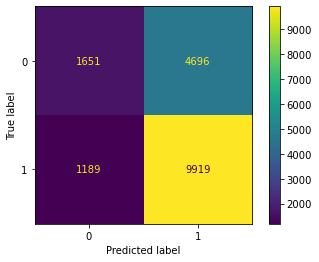

In [19]:
y_lr_tr= lr.predict(X1_train)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
cm_lr_tr= confusion_matrix(y_train, y_lr_tr, labels= lr.classes_)
print(cm_lr_tr)
print('AUC:', roc_auc_score(y_train, y_lr_tr))
print(classification_report(y_train, y_lr_tr))
dcm_lr_tr= ConfusionMatrixDisplay(cm_lr_tr, display_labels= lr.classes_)
dcm_lr_tr.plot()

[[ 680 2040]
 [ 488 4273]]
AUC: 0.5737502625498845
              precision    recall  f1-score   support

           0       0.58      0.25      0.35      2720
           1       0.68      0.90      0.77      4761

    accuracy                           0.66      7481
   macro avg       0.63      0.57      0.56      7481
weighted avg       0.64      0.66      0.62      7481



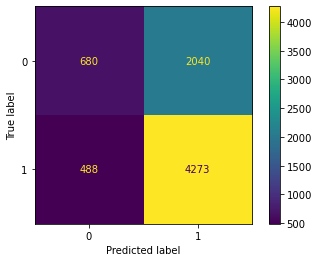

In [20]:
y_lr= lr.predict(X1_test)
cm_lr= confusion_matrix(y_test, y_lr, labels= lr.classes_)
dcm_lr= ConfusionMatrixDisplay(cm_lr, display_labels= lr.classes_)
cr_lr= classification_report(y_test, y_lr)
auc_lr= roc_auc_score(y_test, y_lr)
print(cm_lr)
print('AUC:',auc_lr)
print(cr_lr)
dcm_lr.plot()

              ~~ DecisionTreeClassifier ~~

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X1_train, y_train)

DecisionTreeClassifier()

[[1369 1351]
 [1746 3015]]
AUC: 0.5682895724452351
              precision    recall  f1-score   support

           0       0.44      0.50      0.47      2720
           1       0.69      0.63      0.66      4761

    accuracy                           0.59      7481
   macro avg       0.57      0.57      0.56      7481
weighted avg       0.60      0.59      0.59      7481



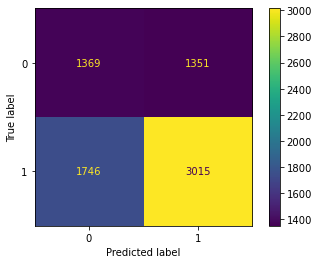

In [22]:
y_dt= dt.predict(X1_test)
cm_dt= confusion_matrix(y_test, y_dt, labels= dt.classes_)
auc_dt= roc_auc_score(y_test, y_dt)
cr_dt= classification_report(y_test, y_dt)
dcm_dt= ConfusionMatrixDisplay(cm_dt, display_labels= dt.classes_)
print(cm_dt)
print('AUC:', auc_dt)
print(cr_dt)
dcm_dt.plot()

              ~~ DecisionTreeClassifier - PreProuning ~~

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_pr= DecisionTreeClassifier(criterion='entropy', max_depth= 3)
dt_pr.fit(X1_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[[ 310 2410]
 [ 165 4596]]
AUC:  0.5396570017420957
              precision    recall  f1-score   support

           0       0.65      0.11      0.19      2720
           1       0.66      0.97      0.78      4761

    accuracy                           0.66      7481
   macro avg       0.65      0.54      0.49      7481
weighted avg       0.65      0.66      0.57      7481



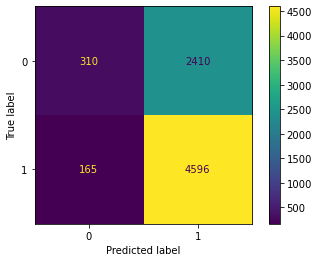

In [24]:
y_dt_pr= dt_pr.predict(X1_test)
cm_dt_pr= confusion_matrix(y_test, y_dt_pr, labels= dt_pr.classes_)
print(cm_dt_pr)
print('AUC: ', roc_auc_score(y_test, y_dt_pr))
print(classification_report(y_test, y_dt_pr))
dcm_dt_pr= ConfusionMatrixDisplay(cm_dt_pr, display_labels= dt_pr.classes_)
dcm_dt_pr.plot()

              ~~ KNeighborsClassifier ~~

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 3)
knn.fit(X1_train, y_train)

KNeighborsClassifier(n_neighbors=3)

[[1135 1585]
 [1214 3547]]
AUC: 0.5811454819798114
              precision    recall  f1-score   support

           0       0.48      0.42      0.45      2720
           1       0.69      0.75      0.72      4761

    accuracy                           0.63      7481
   macro avg       0.59      0.58      0.58      7481
weighted avg       0.62      0.63      0.62      7481



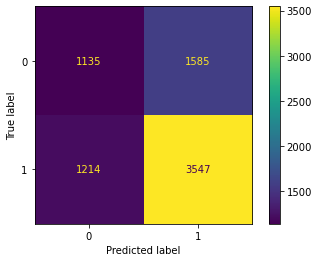

In [26]:
y_knn= knn.predict(X1_test)
cm_knn= confusion_matrix(y_test, y_knn, labels= knn.classes_)
print(cm_knn)
print('AUC:', roc_auc_score(y_test, y_knn))
print(classification_report(y_test, y_knn))
dcm_knn= ConfusionMatrixDisplay(cm_knn, display_labels= knn.classes_)
dcm_knn.plot()

In [27]:
error= []
for i in range(1,25):
    knn1= KNeighborsClassifier(n_neighbors= i)
    knn1.fit(X1_train, y_train)
    y_knn1= knn1.predict(X1_test)
    error.append(np.mean(y_knn1!= y_test))

Text(0, 0.5, 'Mean Error')

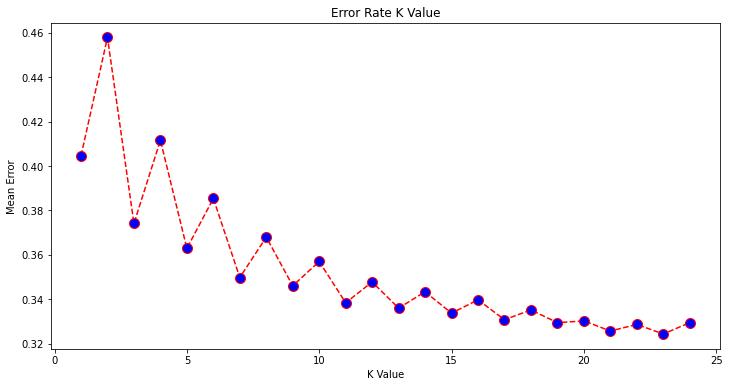

In [28]:
plt.figure(figsize= (12, 6))
plt.plot(range(1, 25), error, color= 'red', linestyle= 'dashed', marker= 'o', markerfacecolor= 'blue', markersize= 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [29]:
knn23= KNeighborsClassifier(n_neighbors= 23)
knn23.fit(X1_train, y_train)

KNeighborsClassifier(n_neighbors=23)

[[2408 3939]
 [1224 9884]]
AUC: 0.6346004926124864
              precision    recall  f1-score   support

           0       0.66      0.38      0.48      6347
           1       0.72      0.89      0.79     11108

    accuracy                           0.70     17455
   macro avg       0.69      0.63      0.64     17455
weighted avg       0.70      0.70      0.68     17455



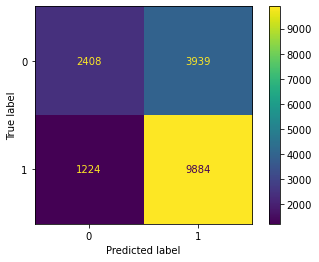

In [30]:
y_knn23_tr= knn23.predict(X1_train)
cm_knn23_tr= confusion_matrix(y_train, y_knn23_tr, labels= knn23.classes_)
print(cm_knn23_tr)
print('AUC:', roc_auc_score(y_train, y_knn23_tr))
print(classification_report(y_train, y_knn23_tr))
dcm_knn23_tr= ConfusionMatrixDisplay(cm_knn23_tr, display_labels= knn23.classes_)
dcm_knn23_tr.plot()

[[ 928 1792]
 [ 635 4126]]
AUC: 0.6039005646366928
              precision    recall  f1-score   support

           0       0.59      0.34      0.43      2720
           1       0.70      0.87      0.77      4761

    accuracy                           0.68      7481
   macro avg       0.65      0.60      0.60      7481
weighted avg       0.66      0.68      0.65      7481



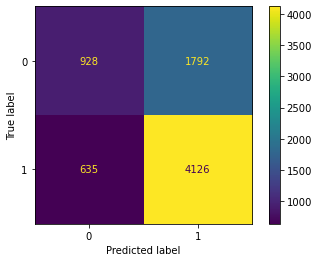

In [31]:
y_knn23= knn23.predict(X1_test)
cm_knn23= confusion_matrix(y_test, y_knn23, labels= knn23.classes_)
print(cm_knn23)
print('AUC:', roc_auc_score(y_test, y_knn23))
print(classification_report(y_test, y_knn23))
dcm_knn23= ConfusionMatrixDisplay(cm_knn23, display_labels= knn23.classes_)
dcm_knn23.plot()

              ~~ KNeighborsClassifier GSCV ~~

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_gs= KNeighborsClassifier()
grid_param= {'n_neighbors': np.arange(1,25)}
gscv_knn= GridSearchCV(knn_gs, grid_param, cv= 5)

In [33]:
gscv_knn.fit(X1, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [34]:
print(gscv_knn.best_params_)
print(gscv_knn.best_score_)

{'n_neighbors': 23}
0.6771338358641852


              ~~ GaussianNB ~~

In [35]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X1_train, y_train)

GaussianNB()

[[ 660 2060]
 [ 463 4298]]
AUC: 0.5726992908064297
              precision    recall  f1-score   support

           0       0.59      0.24      0.34      2720
           1       0.68      0.90      0.77      4761

    accuracy                           0.66      7481
   macro avg       0.63      0.57      0.56      7481
weighted avg       0.64      0.66      0.62      7481



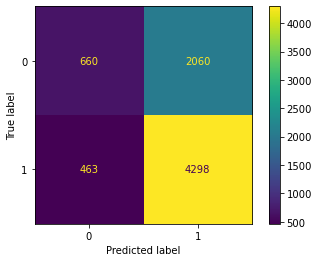

In [36]:
y_nb= nb.predict(X1_test)
cm_nb= confusion_matrix(y_test, y_nb, labels= nb.classes_)
print(cm_nb)
print('AUC:', roc_auc_score(y_test, y_nb))
print(classification_report(y_test, y_nb))
dcm_nb= ConfusionMatrixDisplay(cm_nb, display_labels= nb.classes_)
dcm_nb.plot()

              ~~ SVM(RBF) ~~

In [37]:
from sklearn.svm import SVC
svc= SVC(kernel= 'rbf', gamma= 1)
svc.fit(X1_train, y_train)

SVC(gamma=1)

[[ 876 1844]
 [ 569 4192]]
AUC: 0.6012730580575015
              precision    recall  f1-score   support

           0       0.61      0.32      0.42      2720
           1       0.69      0.88      0.78      4761

    accuracy                           0.68      7481
   macro avg       0.65      0.60      0.60      7481
weighted avg       0.66      0.68      0.65      7481



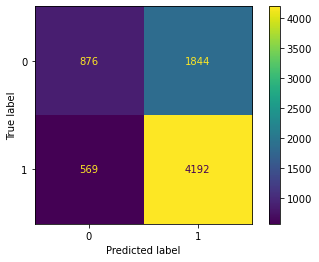

In [38]:
y_svc= svc.predict(X1_test)
cm_svc= confusion_matrix(y_test, y_svc, labels= svc.classes_)
print(cm_svc)
print('AUC:', roc_auc_score(y_test, y_svc))
print(classification_report(y_test, y_svc))
dcm_svc= ConfusionMatrixDisplay(cm_svc, display_labels= svc.classes_)
dcm_svc.plot()

          ~~ SVM(RBF) -  GridSearchCV ~~

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C':[0.1,1,10,100], 
            }
gscv_svc = GridSearchCV(SVC(kernel= 'rbf'), param_grid, refit = True, verbose=3)
gscv_svc.fit(X1_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.657 total time=  17.3s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.656 total time=  14.3s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.658 total time=  15.2s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.661 total time=  16.5s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.650 total time=  14.9s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.668 total time=  14.9s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.664 total time=  18.6s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.664 total time=  16.2s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.674 total time=  20.7s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.651 total time=  17.2s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.636 total time=  21.7s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [40]:
print(gscv_svc.best_estimator_)

SVC(C=100, gamma=0.1)


In [41]:
grid_scores = gscv_svc.cv_results_

[[ 877 1843]
 [ 559 4202]]
AUC: 0.6025070811248254
              precision    recall  f1-score   support

           0       0.61      0.32      0.42      2720
           1       0.70      0.88      0.78      4761

    accuracy                           0.68      7481
   macro avg       0.65      0.60      0.60      7481
weighted avg       0.66      0.68      0.65      7481



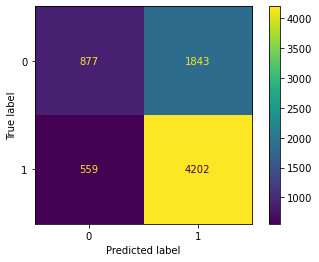

In [42]:
y_gscv_svc= gscv_svc.predict(X1_test)
cm_gscv_svc= confusion_matrix(y_test, y_gscv_svc, labels= gscv_svc.classes_)
print(cm_gscv_svc)
print('AUC:', roc_auc_score(y_test, y_gscv_svc))
print(classification_report(y_test, y_gscv_svc))
dcm_gscv_svc= ConfusionMatrixDisplay(cm_gscv_svc, display_labels= gscv_svc.classes_)
dcm_gscv_svc.plot()

In [43]:
from sklearn.svm import SVC
svc_best= SVC(kernel='rbf', C=100, gamma=0.1)
svc_best.fit(X1_train, y_train)

SVC(C=100, gamma=0.1)

[[ 877 1843]
 [ 559 4202]]
AUC: 0.6025070811248254
              precision    recall  f1-score   support

           0       0.61      0.32      0.42      2720
           1       0.70      0.88      0.78      4761

    accuracy                           0.68      7481
   macro avg       0.65      0.60      0.60      7481
weighted avg       0.66      0.68      0.65      7481



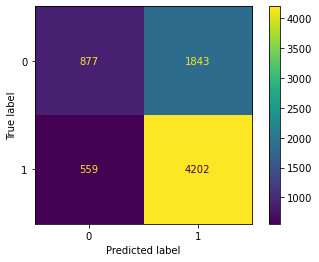

In [44]:
y_svc_best= svc_best.predict(X1_test)
cm_svc_best= confusion_matrix(y_test, y_svc_best, labels= svc_best.classes_)
print(cm_svc_best)
print('AUC:', roc_auc_score(y_test, y_svc_best))
print(classification_report(y_test, y_svc_best))
dcm_svc_best= ConfusionMatrixDisplay(cm_svc_best, display_labels= svc_best.classes_)
dcm_svc_best.plot()

      ~~ VotingClassifier - Soft ~~

In [46]:
from sklearn.ensemble import VotingClassifier
base_learners= [('Knn23', knn23), ('lr', lr)]
ens_s= VotingClassifier(base_learners, voting= 'soft')
ens_s.fit(X1_train, y_train)

VotingClassifier(estimators=[('Knn23', KNeighborsClassifier(n_neighbors=23)),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [47]:
y_ens_s= ens_s.predict(X1_test)

[[ 821 1899]
 [ 504 4257]]
AUC: 0.5979890609362837
              precision    recall  f1-score   support

           0       0.62      0.30      0.41      2720
           1       0.69      0.89      0.78      4761

    accuracy                           0.68      7481
   macro avg       0.66      0.60      0.59      7481
weighted avg       0.67      0.68      0.64      7481



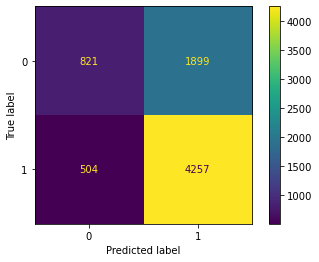

In [48]:
cm_ens_s= confusion_matrix(y_test, y_ens_s, labels= ens_s.classes_)
print(cm_ens_s)
print('AUC:', roc_auc_score(y_test, y_ens_s))
print(classification_report(y_test, y_ens_s))
dcm_ens_s= ConfusionMatrixDisplay(cm_ens_s, display_labels= ens_s.classes_)
dcm_ens_s.plot()

  ~~ VotingClassifier - Hard ~

In [49]:
from sklearn.ensemble import VotingClassifier
base_learners= [('Knn23', knn23), ('lr', lr)]
ens_h= VotingClassifier(base_learners, voting= 'hard')
ens_h.fit(X1_train, y_train)

VotingClassifier(estimators=[('Knn23', KNeighborsClassifier(n_neighbors=23)),
                             ('lr', LogisticRegression())])

[[1124 1596]
 [ 907 3854]]
AUC: 0.6113645489701867
              precision    recall  f1-score   support

           0       0.55      0.41      0.47      2720
           1       0.71      0.81      0.75      4761

    accuracy                           0.67      7481
   macro avg       0.63      0.61      0.61      7481
weighted avg       0.65      0.67      0.65      7481



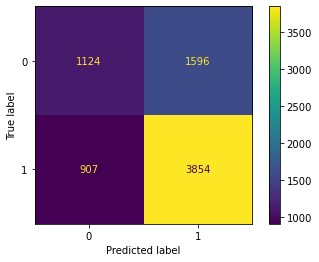

In [50]:
y_ens_h= ens_h.predict(X1_test)
cm_ens_h= confusion_matrix(y_test, y_ens_h, labels= ens_h.classes_)
print(cm_ens_h)
print('AUC:', roc_auc_score(y_test, y_ens_h))
print(classification_report(y_test, y_ens_h))
dcm_ens_h= ConfusionMatrixDisplay(cm_ens_h, display_labels= ens_h.classes_)
dcm_ens_h.plot()